## Customer Risk classifier using Random Forest

This is to demonstrate how to use random forest model to do customer risk classifier base on their demographic details, activities and balances. The sample data used here are randomly generated using Chat-GPT. 

### Load the data
First step of doing this is to load the csv of customers data into pandas dataframe. 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('../data/others/customer_demographic_sample_10k.csv')
df.head()



,Age,Gender,Country,Job Title,Trading Volume per Month (USD),Deposit Volume per Month (USD),Withdrawal Volume per Month (USD),Current Balances (USD)
0,56,Male,Germany,Risk Manager,38125.97,8668.12,5664.24,32505.99
1,69,Female,UK,Compliance Officer,9050.05,29264.09,29563.40,95581.12
2,46,Other,USA,Portfolio Manager,11906.81,10440.46,23893.44,84692.53
3,32,Male,Brazil,Quantitative Analyst,19793.07,12596.48,23678.75,16492.17
4,60,Other,USA,Compliance Officer,15796.90,241.72,4643.74,54469.31


#### US-Sanctiond countries & High Risk Countries
define the US Sanctioned countries and High Risk countries in a list. Which will be used to map to customers country for their risk rating. 

In [38]:
# Define US-sanctioned and unstable countries for the country risk classification
sanctioned_countries = [
    'Iran', 'North Korea', 'Syria', 'Cuba', 'Russia', 'Afghanistan',
    'Balkans', 'Belarus', 'Central African Republic', 'Ethiopia', 
    'Iraq', 'Lebanon', 'Libya', 'Mali', 'Nicaragua', 'Somalia', 'South Sudan',
    'Sudan', 'Venezuela', 'Yemen', 'Zimbabwe', 'Haiti', 'Congo', 'Eritrea',
    'Cyprus', 'Burma'
]
highrisk_countries = ['China', 'Hong Kong']

#### Add a Country Risk column
Add a country risk column and map customer country to sanctioned risk and high risk rating to determine the country risk of customers.

In [39]:
# 1. Assign risk based on Country
def classify_country_risk(country):
    if country in sanctioned_countries:
        return 'Prohibited'
    elif country in highrisk_countries:
        return 'High'
    else:
        return 'Low'

df['Country Risk'] = df['Country'].apply(classify_country_risk)

df.head()

,Age,Gender,Country,Job Title,Trading Volume per Month (USD),Deposit Volume per Month (USD),Withdrawal Volume per Month (USD),Current Balances (USD),Country Risk
0,56,Male,Germany,Risk Manager,38125.97,8668.12,5664.24,32505.99,Low
1,69,Female,UK,Compliance Officer,9050.05,29264.09,29563.40,95581.12,Low
2,46,Other,USA,Portfolio Manager,11906.81,10440.46,23893.44,84692.53,Low
3,32,Male,Brazil,Quantitative Analyst,19793.07,12596.48,23678.75,16492.17,Low
4,60,Other,USA,Compliance Officer,15796.90,241.72,4643.74,54469.31,Low


#### Next Age Factor risk
Older people have more risk to fall victim to scam. Hence the risk factor are higher compare to younger customers. So any customers with age more than threshold should be set to High. 

In [40]:
# 2. Assign risk based on Age
def classify_age_risk(age):
    if age > 70:
        return 'High'
    elif 60 <= age <= 69:
        return 'Medium'
    else:
        return 'Low'

df['Age Risk'] = df['Age'].apply(classify_age_risk)
df.head()


,Age,Gender,Country,Job Title,Trading Volume per Month (USD),Deposit Volume per Month (USD),Withdrawal Volume per Month (USD),Current Balances (USD),Country Risk,Age Risk
0,56,Male,Germany,Risk Manager,38125.97,8668.12,5664.24,32505.99,Low,Low
1,69,Female,UK,Compliance Officer,9050.05,29264.09,29563.40,95581.12,Low,Medium
2,46,Other,USA,Portfolio Manager,11906.81,10440.46,23893.44,84692.53,Low,Low
3,32,Male,Brazil,Quantitative Analyst,19793.07,12596.48,23678.75,16492.17,Low,Low
4,60,Other,USA,Compliance Officer,15796.90,241.72,4643.74,54469.31,Low,Medium


In [41]:
# 3. Assign risk based on Job Title
political_jobs = ['Politician', 'Government Official']
def classify_job_risk(job_title):
    if job_title in political_jobs:
        return 'High'
    else:
        return 'Low'

df['Job Risk'] = df['Job Title'].apply(classify_job_risk)
df.head()



,Age,Gender,Country,Job Title,Trading Volume per Month (USD),Deposit Volume per Month (USD),Withdrawal Volume per Month (USD),Current Balances (USD),Country Risk,Age Risk,Job Risk
0,56,Male,Germany,Risk Manager,38125.97,8668.12,5664.24,32505.99,Low,Low,Low
1,69,Female,UK,Compliance Officer,9050.05,29264.09,29563.40,95581.12,Low,Medium,Low
2,46,Other,USA,Portfolio Manager,11906.81,10440.46,23893.44,84692.53,Low,Low,Low
3,32,Male,Brazil,Quantitative Analyst,19793.07,12596.48,23678.75,16492.17,Low,Low,Low
4,60,Other,USA,Compliance Officer,15796.90,241.72,4643.74,54469.31,Low,Medium,Low


In [42]:
# Combine the risk levels into a final 'Risk Level' column
def combine_risk_levels(row):
    if row['Country Risk'] == 'Prohibited':
        return 'Prohibited'
    elif row['Country Risk'] == 'High' or row['Age Risk'] == 'High' or row['Job Risk'] == 'High':
        return 'High'
    elif row['Age Risk'] == 'Medium':
        return 'Medium'
    else:
        return 'Low'

df['Risk Level'] = df.apply(combine_risk_levels, axis=1)
df.head()


,Age,Gender,Country,Job Title,Trading Volume per Month (USD),Deposit Volume per Month (USD),Withdrawal Volume per Month (USD),Current Balances (USD),Country Risk,Age Risk,Job Risk,Risk Level
0,56,Male,Germany,Risk Manager,38125.97,8668.12,5664.24,32505.99,Low,Low,Low,Low
1,69,Female,UK,Compliance Officer,9050.05,29264.09,29563.40,95581.12,Low,Medium,Low,Medium
2,46,Other,USA,Portfolio Manager,11906.81,10440.46,23893.44,84692.53,Low,Low,Low,Low
3,32,Male,Brazil,Quantitative Analyst,19793.07,12596.48,23678.75,16492.17,Low,Low,Low,Low
4,60,Other,USA,Compliance Officer,15796.90,241.72,4643.74,54469.31,Low,Medium,Low,Medium


In [43]:
# Preprocess categorical features using LabelEncoder
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Job Title'] = label_encoder.fit_transform(df['Job Title'])

# Select features and the target
X = df[['Age', 'Gender', 'Country', 'Job Title', 
        'Trading Volume per Month (USD)', 
        'Deposit Volume per Month (USD)', 
        'Withdrawal Volume per Month (USD)', 
        'Current Balances (USD)']]

y = df['Risk Level']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)

# Print classification report and accuracy score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

        High       1.00      1.00      1.00       744
         Low       1.00      1.00      1.00      1808
      Medium       1.00      1.00      1.00       448

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Accuracy: 0.9996666666666667


#### Visualize the result 
Below are a few visualization plot we can use to validate the result. 

1. Confusion Matrix: This matrix shows how many correct and incorrect predictions were made for each class (Low, Medium, High, Prohibited). The diagonal elements represent correct predictions, and off-diagonal elements represent misclassifications.

2. Bar Plot of Actual vs Predicted Risk Levels: This plot compares the distribution of actual risk levels with predicted risk levels, allowing you to visually assess model performance.

3. Feature Importance: This plot shows how much each feature (age, gender, trading volume, etc.) contributed to the classification, which can help in understanding the model's decision-making process

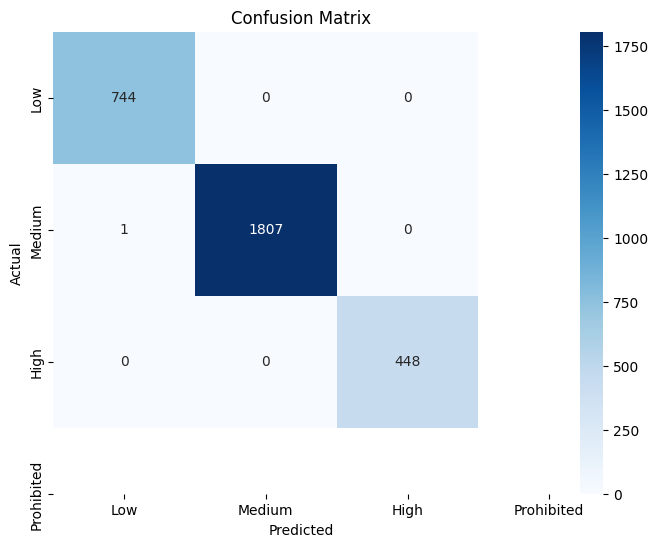

In [44]:
# 1. Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High', 'Prohibited'], yticklabels=['Low', 'Medium', 'High', 'Prohibited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

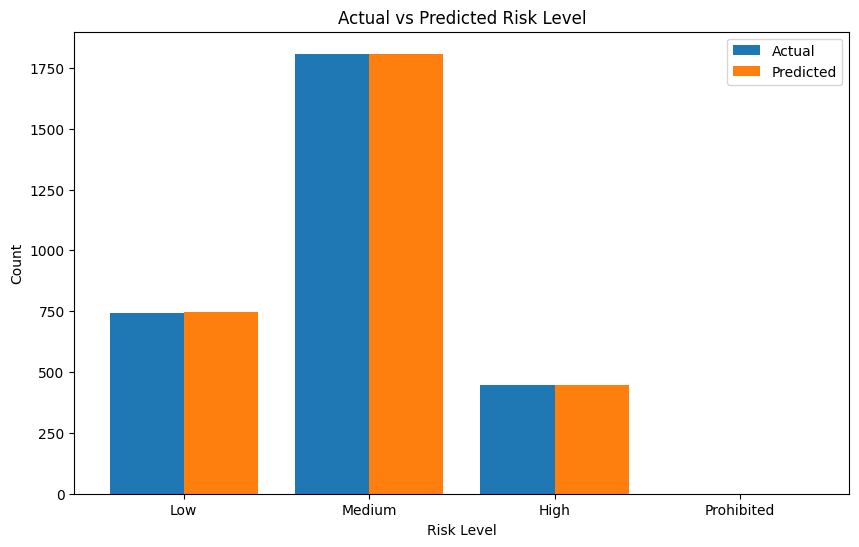

In [45]:
# 2. Bar Plot of Predictions vs Actual
# Define the labels for risk levels
labels = ['Low', 'Medium', 'High', 'Prohibited']

# Count the actual and predicted values
actual_counts = y_test.value_counts().reindex(labels, fill_value=0).sort_index()
predicted_counts = pd.Series(y_pred).value_counts().reindex(labels, fill_value=0).sort_index()

# Plot side by side bar chart for actual vs predicted counts
plt.figure(figsize=(10,6))
width = 0.4
x = np.arange(len(labels))

plt.bar(x - width/2, actual_counts, width, label='Actual')
plt.bar(x + width/2, predicted_counts, width, label='Predicted')

plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Actual vs Predicted Risk Level')
plt.xticks(x, labels)
plt.legend()
plt.show()

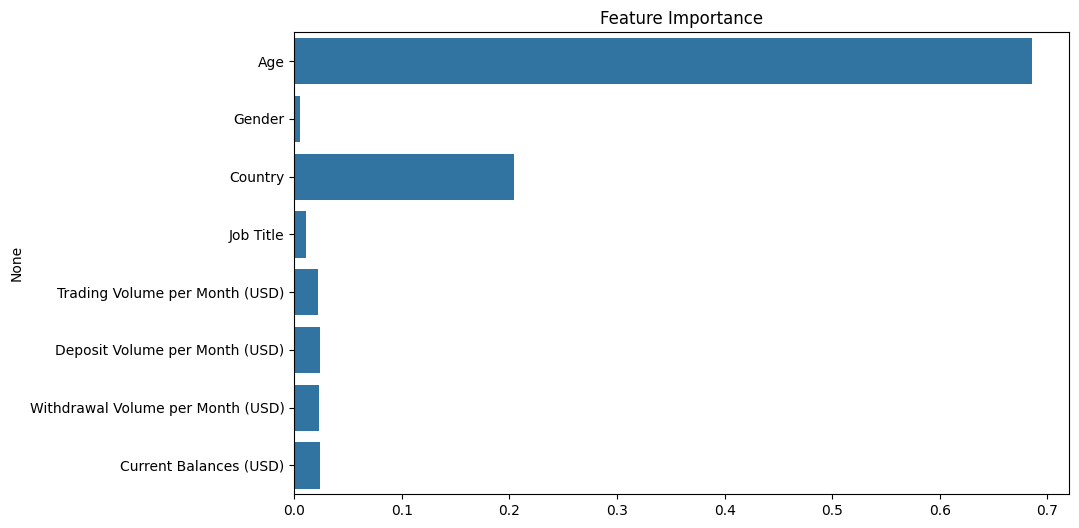

In [46]:
# 3. Feature Importance Plot
# Get feature importances from the RandomForest model
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.show()